Assignment 1 <br>
Econ 213R <br>
Reading in Data from 3 sources to visualization

## Read in Health Data
First, taking the csv from the BRFSS 2015 health survey and creating a dataframe

In [1]:
import pandas as pd, numpy as np
my_data_frame = pd.read_csv(r"C:\Users\user\Documents\Data Projects\Machine Learning\2015.csv", header=0)

<b> Key variables <b> <br>
    Financial Worries SCNTMNY1 (social context) 20.1, col: 602-603 <br>
    7,8,9=. 1-> high 5 -> low <br>
    Emotional Support EMTSUPRT 24.1 col 658 <br>
    7,9=. 1 -> low; 5 -> high <br.>
    Age 7.13 _AGE80 col:1974-1975 Clean! <br>
    Depression binary ADDEPEV2 6.10 col 115 <br>
    7,9=. , 2=0<br>
    Heart Attack CVDINFR4 6.1 col 106 <br>
        7,9=., 2=0 <br>
    Hypertension BPHIGH4 4.1 col 101 <br>
    recode 1=2, 2=0, 3=0, 4=1, 7=., 9=. <br> 
    Self-report health GENHLTH 1.1 col 90 <br>
    7=., 9=., 1 = excellent, 5=poor
    
    


## Condenscing the dataset
Taking 15 or so key variables and limiting the dataframe to these. Also renaming columns

In [18]:
var_names = ['GENHLTH', 'BPHIGH4', 'CVDINFR4', 'ADDEPEV2', '_AGE80', 'EMTSUPRT', 'SCNTMNY1']
health_data = my_data_frame[var_names]
health_data.columns=['badhealth','blood_pressure','heart_attack', 'depression', 'age', 'badsupport','financial_security']
                     
                                       
 

### Cleaning
Essentially there is a lot of weird coding going on here and I need to make these into variables that are usable


In [20]:
health_data['dep']=health_data['depression'].replace(2,0)
health_data['hrt_attack']=health_data['heart_attack'].replace(2,0)
health_data['blood_pressur']=health_data['blood_pressure'].replace([2,3],0)
health_data['blood_pressu']=health_data['blood_pressur'].replace(4,1)
health_data['blood_press']=health_data['blood_pressu'].replace(1,2)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

In [21]:
health_data_clean=health_data[['badhealth','hrt_attack', 'dep', 'badsupport','financial_security','blood_press'
                              ]].replace([7,8,9],np.NaN)

In [27]:
health_data_new = pd.concat([health_data_clean,health_data['age']])

Missing values are an issue, but I treated it in the last assignment. There do not seem to be any outliers or weird values influencing the data set either
### Describing the data
First, summary stats

In [35]:
health_data_new.describe()

,badhealth,hrt_attack,dep,badsupport,financial_security,blood_press,0
count,440209.000000,439227.000000,439259.000000,19733.000000,68196.000000,440089.000000,441456.000000
mean,2.564259,0.057993,0.190749,1.725587,4.044533,0.829378,55.409943
std,1.084004,0.233730,0.392892,1.005233,1.294145,0.985338,17.041646
min,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,18.000000
25%,2.000000,0.000000,0.000000,1.000000,3.000000,0.000000,43.000000
50%,2.000000,0.000000,0.000000,1.000000,5.000000,0.000000,58.000000
75%,3.000000,0.000000,0.000000,2.000000,5.000000,2.000000,69.000000
max,5.000000,1.000000,1.000000,5.000000,5.000000,2.000000,80.000000


In [36]:
health_data_new.corr()

,badhealth,hrt_attack,dep,badsupport,financial_security,blood_press,0
badhealth,1.000000,0.207499,0.237581,0.209916,-0.259961,0.291175,NaN
hrt_attack,0.207499,1.000000,0.052384,0.032866,-0.050458,0.168481,NaN
dep,0.237581,0.052384,1.000000,0.189448,-0.253430,0.071545,NaN
badsupport,0.209916,0.032866,0.189448,1.000000,-0.241734,0.030569,NaN
financial_security,-0.259961,-0.050458,-0.253430,-0.241734,1.000000,-0.032708,NaN
blood_press,0.291175,0.168481,0.071545,0.030569,-0.032708,1.000000,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,1.0


Correlations show that people with bad health tend to have heart attacks, depression, bad support, low financial security, <br>
and high blood pressure. <br>
Interestingly, social support is correlated with subjective reports but only very weakly correlated with objective accounts
<br> of high blood pressure. Same goes with financial security

In [39]:
import seaborn as sns


C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


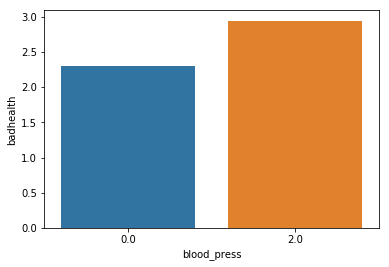

In [41]:
sns.barplot(health_data_new['blood_press'],health_data_new['badhealth'])


In [ ]:
sns.barplot(health_data_new['hrt_attack'],health_data_new['badhealth'])


In [ ]:
sns.lmplot(x="badsupport", y="dep", data=bike_frame_open)
